In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [51]:
train_data = pd.read_csv("/content/UCI_Credit_Card.csv")
train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [53]:
train_data.shape

(30000, 25)

In [54]:
train_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [55]:
train_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [56]:
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [57]:
train_data.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
train_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [58]:
train_data["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [59]:
train_data["SEX"]=train_data["SEX"].map({1:'M',2:'F'}).astype('category')
train_data["SEX"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


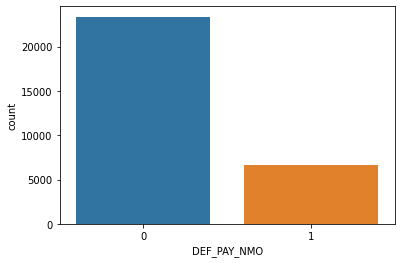

In [60]:
sns.countplot(train_data['DEF_PAY_NMO'])

In [61]:
train_data['DEF_PAY_NMO'].value_counts()

0    23364
1     6636
Name: DEF_PAY_NMO, dtype: int64

In [62]:
train_data["SEX"].value_counts()

F    18112
M    11888
Name: SEX, dtype: int64

###Exploratory Data Analysis

In [63]:
default_by_group_1 = pd.crosstab(index=train_data['DEF_PAY_NMO'],columns = train_data["SEX"], normalize = 'columns')
default_by_group_1


SEX,F,M
DEF_PAY_NMO,,
0,0.792237,0.758328
1,0.207763,0.241672


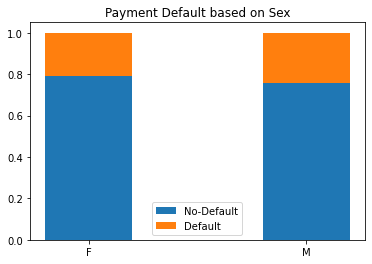

In [64]:
labels = default_by_group_1.columns
list1 = default_by_group_1.iloc[0].to_list()
list2 = default_by_group_1.iloc[1].to_list()
bar_width = 0.4
ax1 = plt.bar(labels,list1, bar_width, label = "No-Default")
ax2 = plt.bar(labels,list2, bar_width, bottom = list1, label = "Default")
plt.title("Payment Default based on Sex")
plt.legend()
plt.show()

###The number of defaulters are more in Male category than Female category

In [65]:
train_data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [66]:
train_data["EDUCATION"] = train_data["EDUCATION"].replace({4:0,5:0,6:0})
train_data["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [67]:
default_by_group_2 = pd.crosstab(index=train_data['DEF_PAY_NMO'],columns = train_data["EDUCATION"], normalize = 'columns')
default_by_group_2

EDUCATION,0,1,2,3
DEF_PAY_NMO,,,,
0,0.929487,0.807652,0.762651,0.748424
1,0.070513,0.192348,0.237349,0.251576


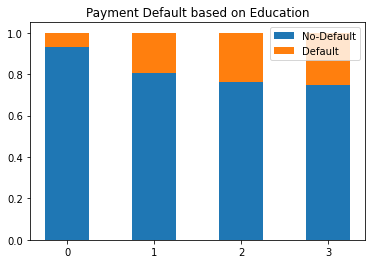

In [68]:
labels = default_by_group_2.columns
list1 = default_by_group_2.iloc[0].to_list()
list2 = default_by_group_2.iloc[1].to_list()
bar_width = 0.5
ax1 = plt.bar(labels,list1, bar_width, label = "No-Default")
ax2 = plt.bar(labels,list2, bar_width, bottom = list1, label = "Default")
plt.xticks(list(range(len(labels))), labels)
plt.title("Payment Default based on Education")
plt.legend()
plt.show()

###The number of Defaulters are more in High School (Education) category than any other ctegory 

In [69]:
train_data["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [70]:
train_data["MARRIAGE"] = train_data["MARRIAGE"].replace({0:3})
train_data["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [71]:
default_by_group_3 = pd.crosstab(index=train_data['DEF_PAY_NMO'],columns = train_data["MARRIAGE"], normalize = 'columns')
default_by_group_3

MARRIAGE,1,2,3
DEF_PAY_NMO,,,
0,0.765283,0.790717,0.763926
1,0.234717,0.209283,0.236074


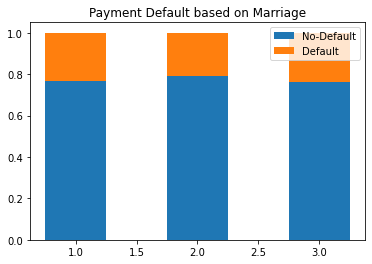

In [72]:
labels = default_by_group_3.columns
list1 = default_by_group_3.iloc[0].to_list()
list2 = default_by_group_3.iloc[1].to_list()
bar_width = 0.5
ax1 = plt.bar(labels,list1, bar_width, label = "No-Default")
ax2 = plt.bar(labels,list2, bar_width, bottom = list1, label = "Default")
plt.title("Payment Default based on Marriage")
plt.legend()
plt.show()

In [73]:
bins= [21,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
train_data1 = pd.cut(train_data['AGE'],bins=bins, labels=labels,right=False)
train_data1

0        20-30
1        20-30
2        30-40
3        30-40
4        50-60
         ...  
29995    30-40
29996    40-50
29997    30-40
29998    40-50
29999    40-50
Name: AGE, Length: 30000, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

In [74]:
default_by_group_4 = pd.crosstab(index=train_data['DEF_PAY_NMO'],columns = train_data1, normalize = 'columns')
default_by_group_4

AGE,20-30,30-40,40-50,50-60,60-70,70-80
DEF_PAY_NMO,,,,,,
0,0.771574,0.797473,0.770266,0.751388,0.716561,0.72
1,0.228426,0.202527,0.229734,0.248612,0.283439,0.28


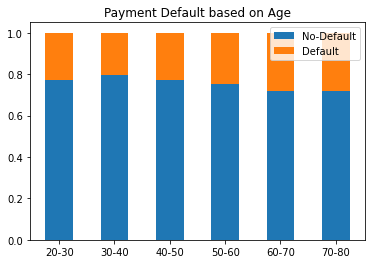

In [75]:
labels = default_by_group_4.columns
list1 = default_by_group_4.iloc[0].to_list()
list2 = default_by_group_4.iloc[1].to_list()
bar_width = 0.5
ax1 = plt.bar(labels,list1, bar_width, label = "No-Default")
ax2 = plt.bar(labels,list2, bar_width, bottom = list1, label = "Default")
plt.title("Payment Default based on Age")
plt.legend()
plt.show()

###The number of defaulters are higher in 60-70 and 70-80 category in Age than any other category

In [76]:
x = train_data.drop(columns=['ID','DEF_PAY_NMO'],axis=1)
y = train_data["DEF_PAY_NMO"]
print(x)
print(y)

       LIMIT_BAL SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0        20000.0   F          2         1   24      2      2     -1     -1   
1       120000.0   F          2         2   26     -1      2      0      0   
2        90000.0   F          2         2   34      0      0      0      0   
3        50000.0   F          2         1   37      0      0      0      0   
4        50000.0   M          2         1   57     -1      0     -1      0   
...          ...  ..        ...       ...  ...    ...    ...    ...    ...   
29995   220000.0   M          3         1   39      0      0      0      0   
29996   150000.0   M          3         2   43     -1     -1     -1     -1   
29997    30000.0   M          2         2   37      4      3      2     -1   
29998    80000.0   M          3         1   41      1     -1      0      0   
29999    50000.0   M          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  

In [77]:
x["SEX"]=x["SEX"].map({'M':1, 'F':2}).astype('category')
x["SEX"].dtypes

CategoricalDtype(categories=[2, 1], ordered=False)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,80000.0,2,2,2,24,0,0,0,0,0,...,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
251,30000.0,1,2,2,28,0,0,0,0,0,...,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
22941,180000.0,2,0,1,44,0,0,-1,-1,-1,...,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
618,60000.0,1,1,2,25,0,0,0,0,0,...,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
17090,130000.0,2,2,2,25,0,0,0,0,0,...,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000.0,1,2,2,32,0,0,0,0,0,...,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
5390,200000.0,1,1,2,37,2,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
860,50000.0,1,1,2,26,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,70000.0,2,2,2,25,0,0,0,0,2,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [80]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler(feature_range=(0,1))

In [81]:
s.fit(x_train)
scaled_train=s.transform(x_train)
print(scaled_train)

[[7.07070707e-02 1.00000000e+00 6.66666667e-01 ... 1.96135266e-03
  3.38781185e-03 1.66558220e-03]
 [2.02020202e-02 0.00000000e+00 6.66666667e-01 ... 1.53784219e-03
  0.00000000e+00 0.00000000e+00]
 [1.71717172e-01 1.00000000e+00 0.00000000e+00 ... 1.10805153e-02
  2.42421969e-02 3.45257359e-04]
 ...
 [4.04040404e-02 0.00000000e+00 3.33333333e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.06060606e-02 1.00000000e+00 6.66666667e-01 ... 1.93236715e-03
  0.00000000e+00 2.27642215e-03]
 [1.51515152e-01 1.00000000e+00 6.66666667e-01 ... 2.65700483e-03
  3.32919919e-02 2.84552768e-03]]


In [82]:
scaled_test=s.transform(x_test)
scaled_test

array([[2.02020202e-02, 0.00000000e+00, 6.66666667e-01, ...,
        2.41545894e-03, 3.51675970e-03, 3.79403691e-03],
       [1.41414141e-01, 1.00000000e+00, 3.33333333e-01, ...,
        4.26247987e-03, 6.25748777e-03, 5.06314226e-03],
       [6.06060606e-02, 1.00000000e+00, 1.00000000e+00, ...,
        3.92592593e-03, 5.86126617e-03, 4.84498514e-03],
       ...,
       [5.05050505e-02, 1.00000000e+00, 3.33333333e-01, ...,
        4.02576490e-03, 3.75121035e-03, 2.84552768e-03],
       [1.01010101e-02, 1.00000000e+00, 3.33333333e-01, ...,
        9.66183575e-04, 0.00000000e+00, 0.00000000e+00],
       [5.05050505e-01, 1.00000000e+00, 1.00000000e+00, ...,
        1.04798712e-02, 1.17225323e-01, 1.32791292e-02]])

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
PAY_1,0.097666
AGE,0.066802
BILL_AMT1,0.060781
LIMIT_BAL,0.059955
BILL_AMT2,0.055302
BILL_AMT3,0.052322
BILL_AMT4,0.050983
BILL_AMT6,0.050675
PAY_AMT1,0.050438
BILL_AMT5,0.050195


###The 5 strongest predictors of default payment are PAY_1, AGE, BILL_AMT1, LIMIT_BAL, and BILL_AMT2 

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty="l2", solver = "saga")

In [85]:
lr.fit(scaled_train,y_train)

LogisticRegression(solver='saga')

In [86]:
lr.predict(scaled_test)

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(scaled_test), target_names=['Default','No-Default']))

              precision    recall  f1-score   support

     Default       0.82      0.97      0.89      4687
  No-Default       0.70      0.22      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000



In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(scaled_test)[:, 1])

0.7205956551080097

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=10)
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor", "RandomForest"]
clfs = [SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(penalty='l2', solver = 'saga'),KNeighborsClassifier(n_neighbors=9),RandomForestClassifier()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,scaled_test,y_test,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
RandomForest,0.808500
Logistic Regression,0.803667
K Nearest Neighbor,0.796833
Support Vector Machine,0.785167
Decision Tree,0.728833


In [90]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, criterion = "entropy")
RF.fit(scaled_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [91]:
RF.predict(scaled_test)

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
print(classification_report(y_test, RF.predict(scaled_test), target_names=['Default','No-Default']))

              precision    recall  f1-score   support

     Default       0.84      0.94      0.89      4687
  No-Default       0.63      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [93]:
import xgboost as xgb
from xgboost import XGBClassifier

In [94]:
xgbc = XGBClassifier(n_estimators=500, learning_rate=0.05)
xgbc.fit(scaled_train,y_train)

XGBClassifier(learning_rate=0.05, n_estimators=500)

In [95]:
xgbc.predict(scaled_test)

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
print(classification_report(y_test, xgbc.predict(scaled_test), target_names=['Default','No-Default']))

              precision    recall  f1-score   support

     Default       0.84      0.95      0.89      4687
  No-Default       0.66      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgbc.predict_proba(scaled_test)[:, 1])

0.7817232314884343